In [1]:
import openpnm as op

In [2]:
pn = op.network.Cubic(shape=[20, 20, 20])
pn.add_boundary_pores(labels=['bottom'])

In [3]:
pn.keys()

dict_keys(['pore.coords', 'throat.conns', 'pore.all', 'throat.all', 'pore.internal', 'throat.internal', 'pore.surface', 'pore.front', 'pore.back', 'pore.left', 'pore.right', 'pore.top', 'pore.bottom', 'throat.surface', 'pore.bottom_boundary', 'throat.bottom_boundary'])

In [4]:
for k in ['pore.bottom_boundary','pore.surface','throat.bottom_boundary','throat.surface']:
    del pn[k]

In [5]:
geom = op.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)

In [6]:
geom['pore.volume'][pn.pores('left')] = 0

In [7]:
geom.keys()

dict_keys(['pore.all', 'throat.all', 'pore.seed', 'pore.max_size', 'pore.diameter', 'pore.area', 'pore.volume', 'throat.max_size', 'throat.diameter', 'throat.endpoints.head', 'throat.endpoints.tail', 'throat.length', 'throat.surface_area', 'throat.volume', 'throat.area', 'throat.conduit_lengths.pore1', 'throat.conduit_lengths.throat', 'throat.conduit_lengths.pore2'])

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.topotools.topotools._scale_3d_axes 
    TIME STAMP: 2019-06-19 21:59:00,381    


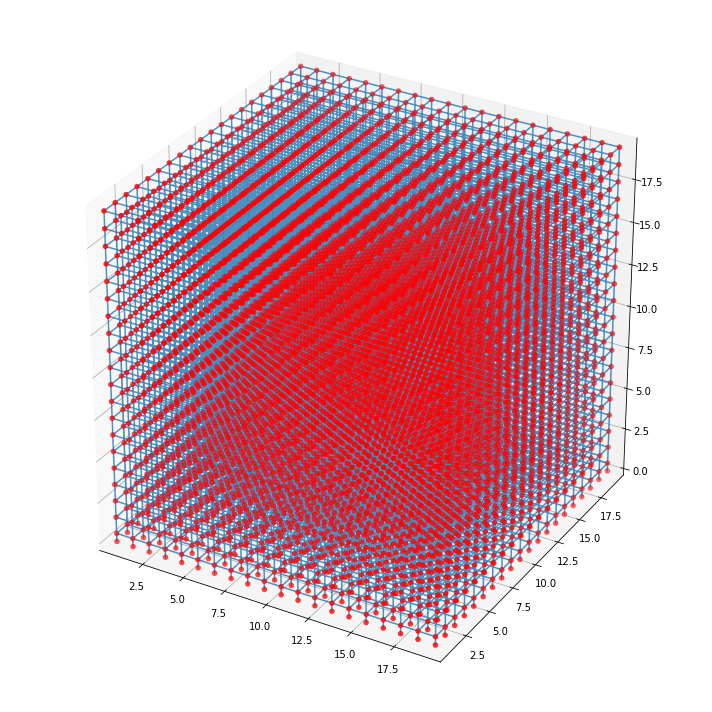

In [23]:
fig = op.topotools.plot_connections(network=pn, alpha=0.8)
fig = op.topotools.plot_coordinates(network=pn, fig=fig, color='r')
fig.set_size_inches(10, 10)
fig.tight_layout()

In [8]:
for k in {'pore.max_size', 'pore.seed', 'throat.max_size', 'throat.surface_area'}:
    del geom[k]

In [9]:
pn.keys()

dict_keys(['pore.coords', 'throat.conns', 'pore.all', 'throat.all', 'pore.internal', 'throat.internal', 'pore.front', 'pore.back', 'pore.left', 'pore.right', 'pore.top', 'pore.bottom', 'pore.geo_01', 'throat.geo_01', 'pore._id', 'throat._id'])

In [10]:
hg = op.phases.Mercury(network=pn)

In [11]:
hg.keys()

dict_keys(['pore.all', 'throat.all', 'pore.temperature', 'pore.pressure', 'pore.molecular_weight', 'pore.critical_pressure', 'pore.critical_temperature', 'pore.critical_volume', 'pore.contact_angle', 'pore.electrical_conductivity', 'pore.diffusivity', 'pore.vapor_pressure', 'pore.density', 'pore.molar_density', 'pore.surface_tension', 'pore.thermal_conductivity', 'pore.viscosity'])

In [12]:
hg['pore.surface_tension']

array([0.4791, 0.4791, 0.4791, ..., 0.4791, 0.4791, 0.4791])

In [13]:
pn.keys()

dict_keys(['pore.coords', 'throat.conns', 'pore.all', 'throat.all', 'pore.internal', 'throat.internal', 'pore.front', 'pore.back', 'pore.left', 'pore.right', 'pore.top', 'pore.bottom', 'pore.geo_01', 'throat.geo_01', 'pore._id', 'throat._id'])

In [14]:
phys = op.physics.GenericPhysics(network=pn, phase=hg, geometry=geom)

In [15]:
phys.keys()

dict_keys(['pore.all', 'throat.all'])

In [16]:
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

In [17]:
phys.keys()

dict_keys(['pore.all', 'throat.all', 'throat.entry_pressure'])

In [20]:
phys['throat.entry_pressure'].mean()

9.398096840785895

In [22]:
geom['throat.length'].mean()

0.5943016937501592

In [17]:
mip = op.algorithms.Porosimetry(network=pn, phase=hg)
mip.set_inlets(pores=pn.pores('left'))
mip.run(points=100)

In [18]:
mip.keys()

dict_keys(['pore.all', 'throat.all', 'pore.invasion_pressure', 'throat.invasion_pressure', 'pore.invasion_sequence', 'throat.invasion_sequence', 'pore.inlets', 'pore.outlets', 'pore.residual', 'throat.residual', 'throat.entry_pressure'])

In [19]:
pn.keys()

dict_keys(['pore.coords', 'throat.conns', 'pore.all', 'throat.all', 'pore.internal', 'throat.internal', 'pore.front', 'pore.back', 'pore.left', 'pore.right', 'pore.top', 'pore.bottom', 'pore.geo_01', 'throat.geo_01', 'pore._id', 'throat._id'])

In [20]:
hg.keys()

dict_keys(['pore.all', 'throat.all', 'pore.temperature', 'pore.pressure', 'pore.molecular_weight', 'pore.critical_pressure', 'pore.critical_temperature', 'pore.critical_volume', 'pore.contact_angle', 'pore.electrical_conductivity', 'pore.diffusivity', 'pore.vapor_pressure', 'pore.density', 'pore.molar_density', 'pore.surface_tension', 'pore.thermal_conductivity', 'pore.viscosity', 'pore.phys_01', 'throat.phys_01'])

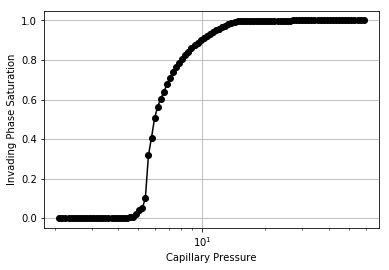

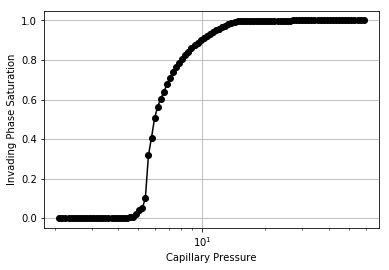

In [21]:
mip.plot_intrusion_curve()

In [22]:
mip.get_intrusion_data()

pc_curve(Pcap=array([ 2.10422408,  2.17617395,  2.25058401,  2.32753837,  2.40712404,
        2.48943099,  2.57455226,  2.66258409,  2.753626  ,  2.84778091,
        2.94515527,  3.04585915,  3.15000641,  3.25771478,  3.36910603,
        3.48430609,  3.60344519,  3.72665803,  3.85408388,  3.98586682,
        4.12215582,  4.26310496,  4.40887358,  4.55962648,  4.71553408,
        4.87677264,  5.04352444,  5.215978  ,  5.39432827,  5.57877688,
        5.76953236,  5.96681035,  6.17083388,  6.3818336 ,  6.60004804,
        6.82572391,  7.05911633,  7.30048915,  7.55011524,  7.80827682,
        8.07526573,  8.35138381,  8.63694321,  8.93226677,  9.23768834,
        9.55355321,  9.88021847, 10.21805341, 10.56743997, 10.92877312,
       11.30246137, 11.68892715, 12.08860739, 12.50195392, 12.92943403,
       13.371531  , 13.82874462, 14.30159178, 14.79060702, 15.2963432 ,
       15.81937205, 16.36028485, 16.91969312, 17.49822928, 18.09654736,
       18.71532376, 19.35525803, 20.01707361, 20.7